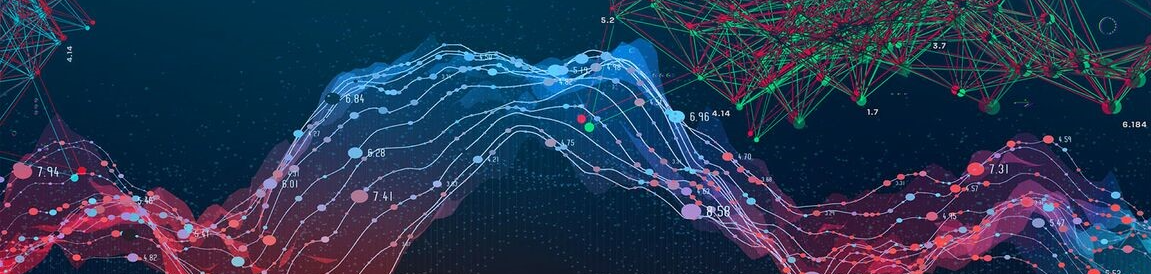
# Welcome to the interflow Quickstarter!


## Introduction

**interflow** is an open-source python package for collecting, calculating, organizing, and visualizing cross-sectoral resource interdependencies and flows.

This Jupyter Notebook serves a ready-to-go introduction to the package using sample data United States counties for the year 2015. The sample data is used to analyze the interdependencies between water and energy across various sectors.

For more information on the package, including the user guide, the sample data methodology, and other information, please visit [the interflow documentation](https://kmongird.github.io/interflow/index.html)

To visit the GitHub repository where interflow is stored, [go here](https://github.com/kmongird/interflow)

## Importing the package

Click on the cell below and hit ctrl-enter to import the interflow package and its modules.

In [ ]:
# import the package
import interflow

## Get sample data
The interflow package comes with sample data for all counties in the United States for the year 2015. To load the sample input data, run the cell below.

In [ ]:
# read in the sample data
data_input = interflow.read_sample_data()

## Run the Model
Now that our input data is prepared, we can run some or all of it through the model to start collecting, computing, and organizing our water and energy flows.

#### Selecting an Region
The US sample data comes with data for analyzing over 3,000 different US counties. The interflow package is capable of running an individual county at a time or the entire dataset of counties. The cell below selects a single county to run through the model. The counties are presented here under their Federal Information Processing Standards (FIPS) code rather than a name. The cell below sets the region for analysis equal to the FIPS code for New York County, NY (36061). 

To select other counties from this dataset, any FIPS code can be chosen from the input dataset or retrieved from the list presented here: [County FIPS List](https://kmongird.github.io/interflow/county_list.html)

#### Run the model for a single region
Run the cell below to run the model for the select region

In [ ]:
# set the region equal to the FIPS code for New York County, NY
region = '36061'

In [ ]:
# run the model for the select region
output = interflow.calculate(data=data_input, region_name=region)

## Observe the output dataset
The output dataset is a Pandas DataFrame of flow values between the source sector node (Columns S1 through S5) to the target sector node (Columns T1 through T5) in indicated units. The number after S or T indicates the level of sector granularity where S1 is the major source sector name, S2 is the subsector/application under that sector for that row.

The cell below shows the first five rows of the output. We can read the first row of output as the bbtu flow value between the EPD (Energy Production Demand), Biomass Node to the COM, Biomass Demand node for county number 36061.

In [ ]:
output.head()

## Visualize the flows between sectors
The output dataset itself provides the values between nodes for both water and energy, however, it is not very intuitive on its own for understanding the relationships between nodes and how resources pass from one to the next. The various visualization tools integrated into the model can help with this.

### Sankey Diagrams
Sankey diagrams show flows between nodes and are able to represent how resources are passed along in a network. The cell below will produce two sankey diagrams with the sample data run output, one for water flows (given in million gallons per day) and one for energy flows (given in billion british thermal units per day).

In [ ]:
viz = interflow.plot_sankey(data=output, region_name= region, 
                       unit_type1 = 'mgd', unit_type2='bbtu', output_level=1, strip='total')

### Stacked Sector Bar Charts
In addition to sankey diagrams which show the flows from sector to sector, it's useful to see the breakdown within each sector.

#### Inflow bar charts
The bar chart option allows us to see the breakdown of inflows or outflows to a sector broken up by its subsectors/applications. Setting inflow equal to True will display the values by subsector for each sector in the specified unit.

In [ ]:
# create a list of sectors that you want to see a barchart of
sectors = ['WWD', 'EGS']

In [ ]:
# plot a stacked barchart of inflows to the specified sectors
interflow.plot_sector_bar(data=output, unit_type='bbtu', region_name =region, 
                     sector_list=sectors, inflow=True, strip='total')

#### Outflow barcharts
To observe where outflows from a sector end up you can set the inflow parameter to False, as shown below.

In [ ]:
# plot a stacked barchart of inflows to the specified sectors
interflow.plot_sector_bar(data=output, unit_type='bbtu', region_name =region, 
                     sector_list=sectors, inflow=False, strip='total')

### Regional Shaded Maps
Now that we've looked at the values across all sectors within a specific region, the values within a specific sectors in a specific region, we can additionally look at all values for all regions. This can help us see how values compare from one area to another.

The interflow.plot_map() function will shade regions for all values available. In the above example we've only run the model for one of the 3,000+ regions available. Running the map with our current output, therefore, will only show one region shaded. To shade all counties in the US, the full run output needs to be supplied.

The model can be run to compute all counties simultaneously simply by not specificing a county in the region parameter. To avoid the computation time required, the full output of the sample data can instead be loaded below.

#### Load map data

In [ ]:
# load full sample data output for all counties
full_output = interflow.load_sample_data_output()

# load GeoJSON file of counties
geo = interflow.load_sample_geojson_data()

#### Generate Cloropleth Map
The cloropleth map comes with a dropdown menu of flow values from node to node. Selecting a new value will update the map. Additionally, the map can be generated for various levels of data granularity.

In [ ]:
# plot flow values in a cloropleth map at level 2 granularity
interflow.plot_map(data=full_output, jsonfile = geo, level=2)